In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import re
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer # it is used to analyze the meaning behind a word.
from nltk.corpus import stopwords # it is used for removing the stopwords (such as “the”, “a”, “an”, “in”).
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # it is used to vectorize thr text documents.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as mt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

True

In [2]:
df = pd.read_csv('train.csv')
df.head(10) #Show data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


C:\Users\x270\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


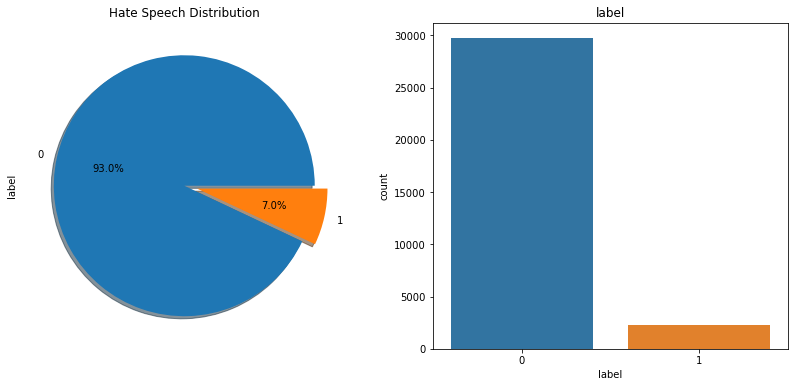

In [4]:
df=df.drop("id", axis=1)
f,ax=plt.subplots(1,2,figsize=(14,6))
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('label',data=df,ax=ax[1])
ax[0].set_title('Hate Speech Distribution')
ax[1].set_title('label')
plt.show()

In [5]:
def text_pre_processing(tweet):
  
  tweet = tweet.lower()
  tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
  tweet = re.sub(r'\@w+|#', '', tweet)
  tweet = re.sub(r'ð', '', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tokenize = word_tokenize(tweet)
  tweet_filter = [w for w in tokenize if not w in stop_words]

  return " ".join(tweet_filter)

def text_remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [6]:
df.tweet = df['tweet'].apply(text_pre_processing) 
df.tweet = df['tweet'].apply(text_remove_emoji) 
df = df.drop_duplicates('tweet') # dropping the duplicates tweets

In [7]:
lemmatizer = WordNetLemmatizer()
def word_lemmatize(data):
  tweet = [lemmatizer.lemmatize(word) for word in data]
  return data

In [8]:
df["tweet"] = df["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['tweet'] = df['tweet'].apply(lambda x: word_lemmatize(x))
df.head(10)

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit cant use cause do...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
5,0,22 huge fan fare big talking leave chaos pay d...
6,0,user camping tomorrow user user user user user...
7,0,next school year year exams cant think school ...
8,0,love land allin cavs champions cleveland cleve...
9,0,user user welcome im gr8


In [9]:
df['label'].value_counts()


0    27352
1     1993
Name: label, dtype: int64

In [10]:
pd.Series(" ".join(df["tweet"]).split()).value_counts() #word counts

user                                                                       17023
love                                                                        2177
day                                                                         2092
â                                                                           1845
happy                                                                       1541
                                                                           ...  
oseaaa                                                                         1
kamakurajapanrainydaytravelseanaturewonderfulperfectworkhardtrudgerelax        1
8233970000                                                                     1
diwali                                                                         1
chisolm                                                                        1
Length: 44016, dtype: int64

C:\Users\x270\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


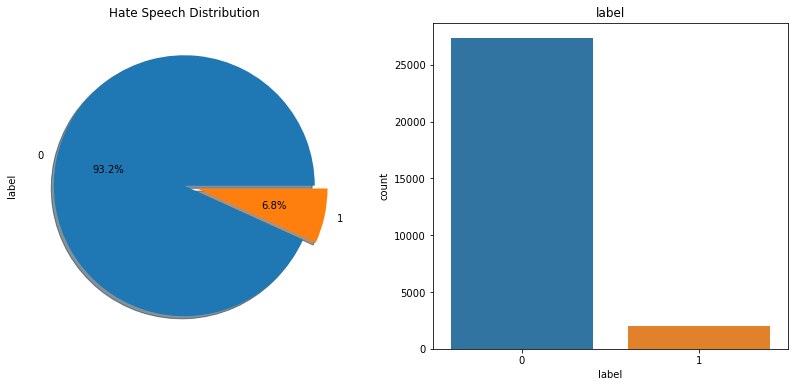

In [11]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('label',data=df,ax=ax[1])
ax[0].set_title('Hate Speech Distribution')
ax[1].set_title('label')
plt.show()

In [12]:
vector = TfidfVectorizer(ngram_range = (1,2))

In [13]:
X = df['tweet']
Y = df['label']
vector.fit_transform(X)
X = vector.transform(X)
     
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123 )
     
x_train.shape

(23476, 208579)

In [14]:
x_test.shape

(5869, 208579)

Logistic Regression Model Implementation
Accuracy: 0.936
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5466
           1       0.90      0.07      0.13       403

    accuracy                           0.94      5869
   macro avg       0.92      0.53      0.55      5869
weighted avg       0.93      0.94      0.91      5869



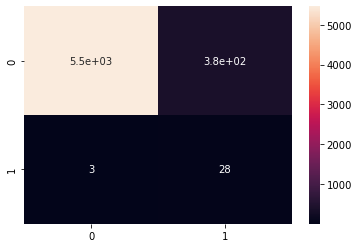

In [15]:
print("Logistic Regression Model Implementation")
lr = LogisticRegression()
model=lr.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))
c_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(c_matrix, annot = True)
print(classification_report(y_test, y_pred))


Decision Tree Model Implementation
Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5466
           1       0.63      0.44      0.52       403

    accuracy                           0.94      5869
   macro avg       0.80      0.71      0.74      5869
weighted avg       0.94      0.94      0.94      5869



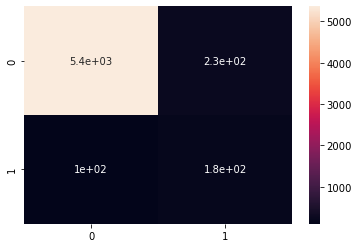

In [16]:
print("Decision Tree Model Implementation")
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))
c_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(c_matrix, annot = True)
print(classification_report(y_test, y_pred))


Support Vector Machine Model Implementation
Accuracy: 0.957
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5466
           1       0.94      0.40      0.57       403

    accuracy                           0.96      5869
   macro avg       0.95      0.70      0.77      5869
weighted avg       0.96      0.96      0.95      5869



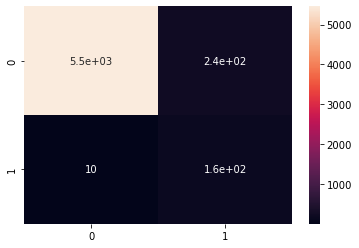

In [17]:
print("Support Vector Machine Model Implementation")
svm = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
model=svm.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))
c_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(c_matrix, annot = True)
print(classification_report(y_test, y_pred))